In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from scipy.stats import norm

In [2]:
df = pd.read_csv('hour.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
del df['dteday']

In [5]:
df.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df.isnull().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df = df.rename(columns={'weathersit':'weather',
                        'yr':'year',
                        'mnth':'month',
                        'hr':'hour',
                        'hum':'humidity',
                        'cnt':'count'})
df.head

<bound method NDFrame.head of        instant  season  year  month  hour  holiday  weekday  workingday  \
0            1       1     0      1     0        0        6           0   
1            2       1     0      1     1        0        6           0   
2            3       1     0      1     2        0        6           0   
3            4       1     0      1     3        0        6           0   
4            5       1     0      1     4        0        6           0   
...        ...     ...   ...    ...   ...      ...      ...         ...   
17374    17375       1     1     12    19        0        1           1   
17375    17376       1     1     12    20        0        1           1   
17376    17377       1     1     12    21        0        1           1   
17377    17378       1     1     12    22        0        1           1   
17378    17379       1     1     12    23        0        1           1   

       weather  temp   atemp  humidity  windspeed  casual  registered

In [8]:
len(df.columns)

16

In [9]:
df.head()

,instant,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Explanatory data analysis**

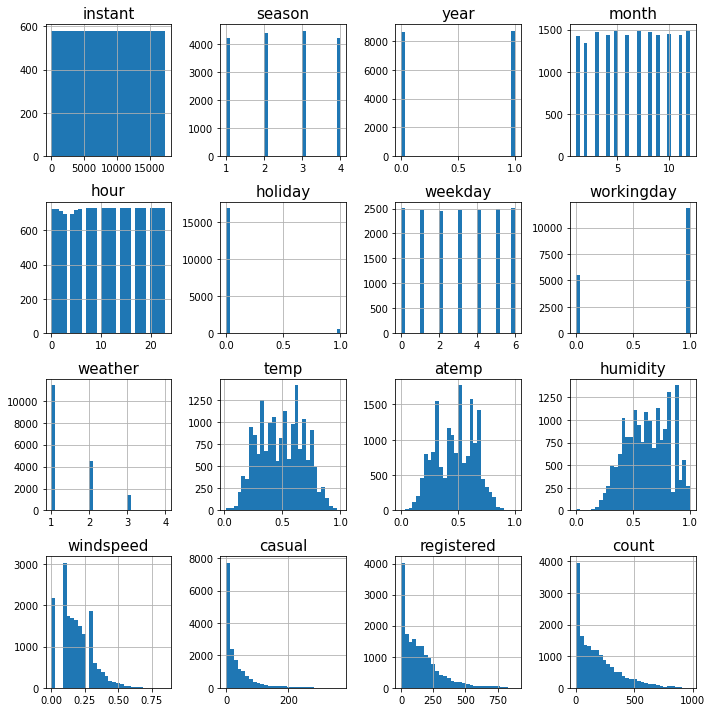

In [10]:
fig = df.hist(bins = 30, figsize=(10, 10))
[x.title.set_size(15) for x in fig.ravel()]
plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'Bicycle count on weekdays and weekends')]

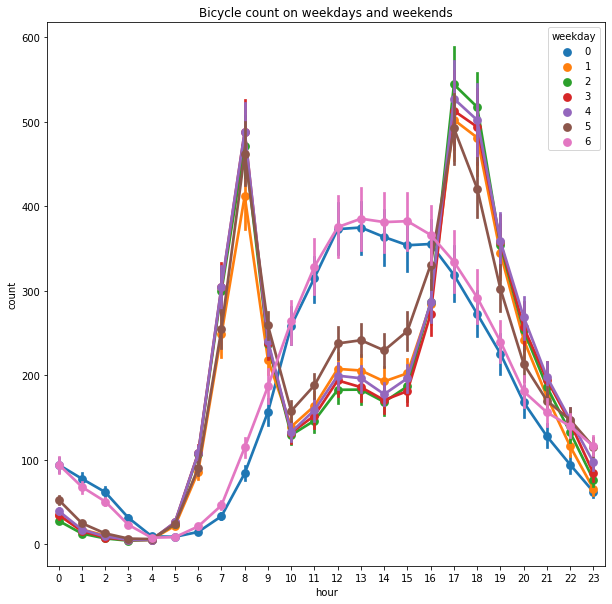

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.pointplot(data=df, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title='Bicycle count on weekdays and weekends')

[Text(0.5, 1.0, 'Bicycle count on weekdays and weekends: Users havent yet registered')]

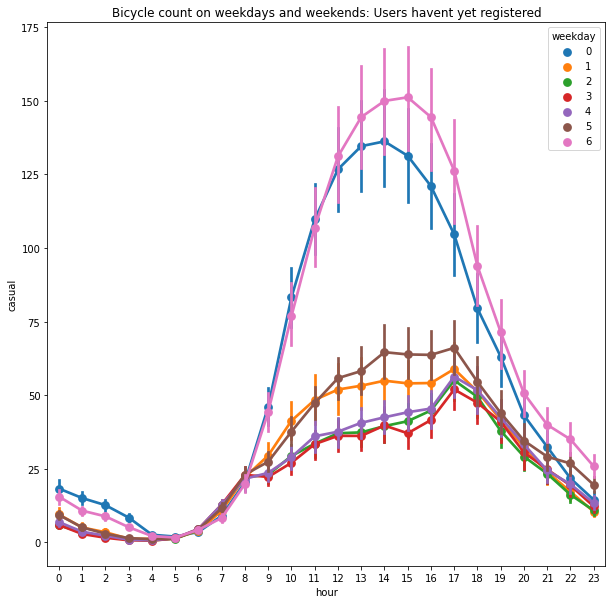

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
sns.pointplot(data=df, x='hour', y='casual', hue='weekday', ax=ax)
ax.set(title='Bicycle count on weekdays and weekends: Users havent yet registered')

[Text(0.5, 1.0, 'Bicycle count on weekdays and weekends: Users have registered')]

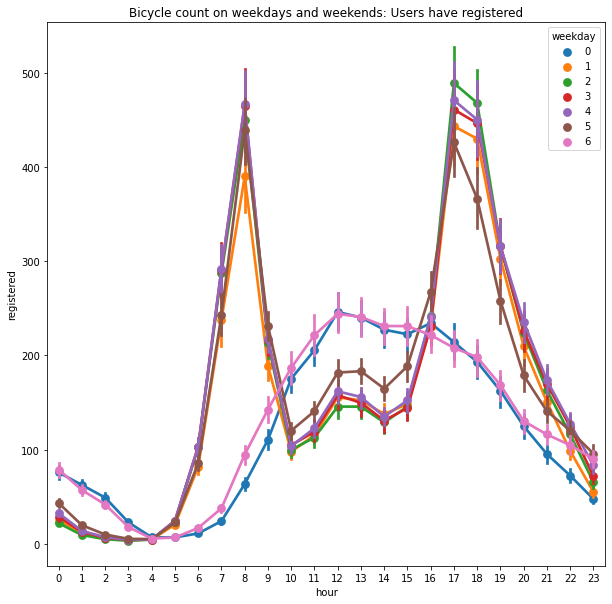

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.pointplot(data=df, x='hour', y='registered', hue='weekday', ax=ax) 
ax.set(title='Bicycle count on weekdays and weekends: Users have registered')

[Text(0.5, 1.0, 'The number of bikes in various weather conditions')]

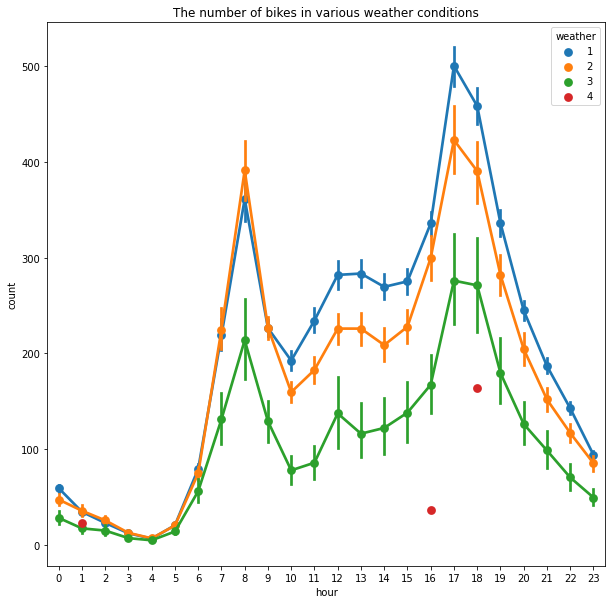

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
sns.pointplot(data=df, x='hour', y='count', hue='weather', ax=ax)
ax.set(title='The number of bikes in various weather conditions')

[Text(0.5, 1.0, 'The number of bikes in various Months')]

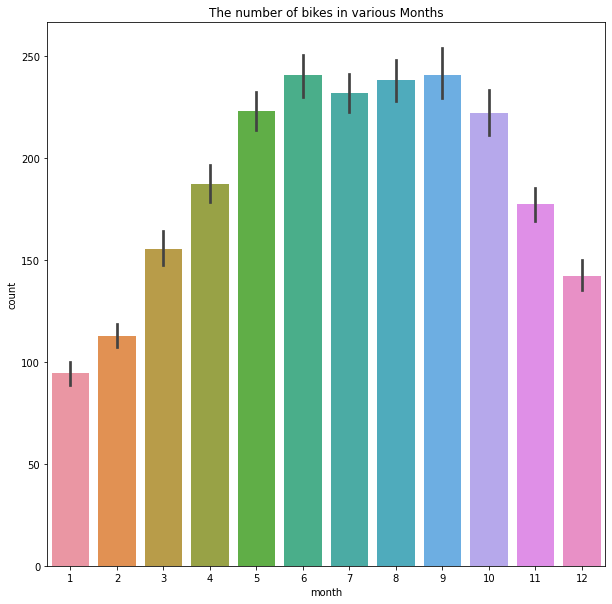

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=df, x='month', y='count', ax=ax)
ax.set(title='The number of bikes in various Months')

[Text(0.5, 1.0, 'The number of bikes in various weekdays')]

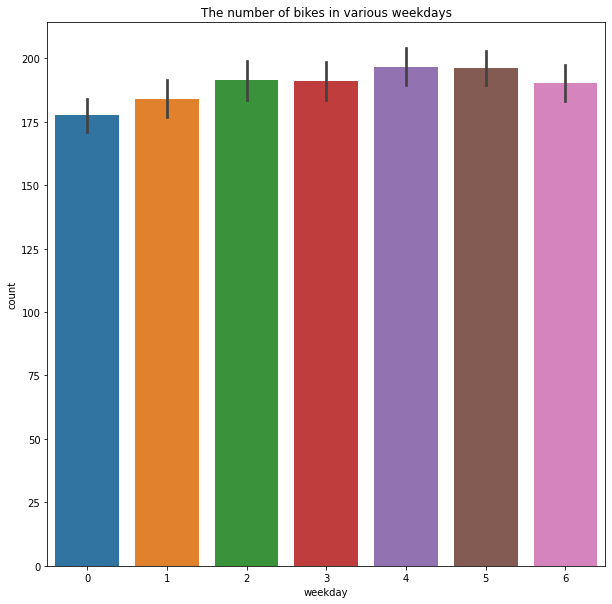

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=df, x='weekday', y='count', ax=ax)
ax.set(title='The number of bikes in various weekdays')

Regression plot of temperature and humidity with respect to count.

[Text(0.5, 1.0, 'Relation between humidity and users')]

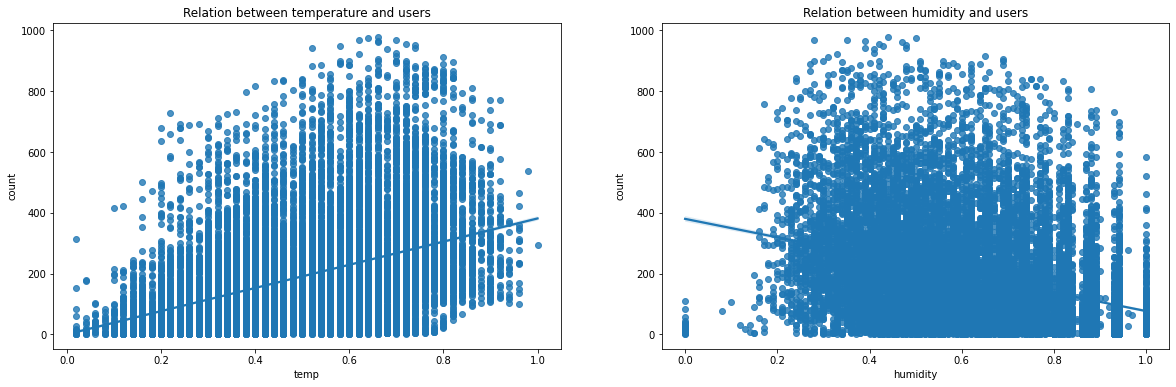

In [17]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['temp'], y=df['count'], ax=ax1)
ax1.set(title="Relation between temperature and users") 
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2) 
ax2.set(title="Relation between humidity and users")


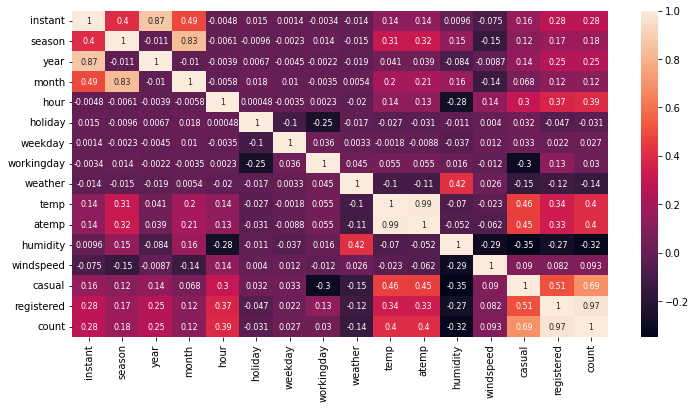

In [18]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, annot_kws={'size':8})

[Text(0.5, 1.0, 'User and humidity relationships')]

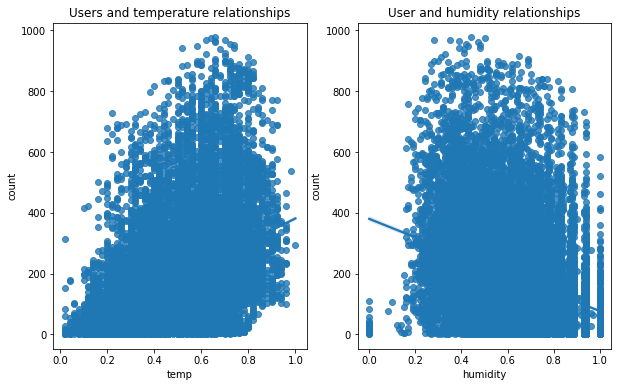

In [19]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,6))
sns.regplot(x=df['temp'], y=df['count'], ax=ax1)
ax1.set(title="Users and temperature relationships")
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2)
ax2.set (title="User and humidity relationships")

In [20]:
learning_rate = 0.5
iterations = 4000
hidden_nodes = 17
op_nodes = 1

In [21]:

class LinearRegression:



    def __init__(self, X,y, tolerance, learningRate, maxIter,reg_lambda=0, 
                 sgd_sample_size=1, gd=False, sgd=False, reg= False, regtype= "ridge")->None:
      self.X= X
      self.y=y
      self.tolerance=tolerance
      self.learningRate=learningRate
      self.maxIter=maxIter
      self.gd=gd
      self.sgd= sgd
      self.sgd_sample_size= sgd_sample_size
      self.reg= reg
      self.reg_lambda= reg_lambda
      self.regtype= regtype


    def datasplit(self):
      X_train, X_test, y_train, y_test= train_test_split(self.X, self.y, 
                                                         test_size =0.3,
                                                         random_state=0)
      return X_train, X_test, y_train, y_test

    def add_X0(self,X):
      return np.column_stack([np.ones([X.shape[0],1]), X ])

    def normalize(self, X):
      mean= np.mean(X,0)
      std= np.std(X,0)

      X_norm=(X-mean)/std
      X_norm=self.add_X0(X_norm)
      return X_norm, mean, std

    def normalizeTestData(self, X, mean, std):
      X_norm= (X- mean)/std
      X_norm=self.add_X0(X_norm)
      return X_norm
    
    def checkMatrix(self,X):
      rank= np.linalg.matrix_rank(X)
      if rank== min(X.shape[0], X.shape[1]):
        self.fullRank=True
        print("Data is full rank")
      else:
        self.fullRank=False
        print("Data is not full rank")

    def matrixInvertibility(self,X):
      if X.shape[0]< X.shape[1]:
        self.lowRank= True
        print('Data is Low Rank')
      else:
        self.lowRank= False
        print("Data is not Low Rank")
        
    def NormalEquation(self, X, y):
      if self.reg==False:
        w= np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

      else:
        w=np.linalg.inv(X.T.dot(X)+ self.reg_lambda*(np.identity(X.shape[1]))).dot(X.T).dot(y)
      return w

    def predict(self, X):
      y_hat= X.dot(self.w)
      return y_hat

    def sse(self, X, y):
      y_hat= self.predict(X)
      return ((y_hat-y)**2).sum()

    def gradientDescent(self, X, y):
      errors=[]
      last_error=float('inf')

      for i in tqdm(range(self.maxIter)):
        self.w= self.w- self.learningRate*self.costDerivate(X,y)
        current_error=self.sse(X, y)
        diff= last_error-current_error
        last_error= current_error

        errors.append(current_error)

        if diff < self.tolerance:
          print("Model has stopped learning")
          break   

      self.plot_rmse(errors)
    
    def stochasticGradientDescent(self, X, y):
  # For each iteration of sgd, a new sample of training data is used.
      errors=[]
      last_error=float('inf')

      for i in tqdm(range(self.maxIter)):
        X_sgd,X_nsgd, y_sgd, y_nsgd= train_test_split(X,y,train_size=self.sgd_sample_size)
        self.w=self.w- self.learningRate* self.costDerivate(X_sgd, y_sgd)
        current_error= self.sse(X_sgd,y_sgd)
        diff=last_error-current_error
        last_error=current_error

        errors.append(current_error)

        if diff < self.tolerance:
          print("Model has stopped Learning")
          break

      self.plot_rmse(errors)



    def costFunction(self, X, y):
      return self.sse(X,y)/2

    def costDerivate(self,X, y):
      y_hat= self.predict(X)
      if self.reg==False:
        return(y_hat-y).dot(X)
      elif self.reg==True and self.regtype=="ridge":
        return(y_hat-y).dot(X)+(self.reg_lambda*self.w)
      elif self.reg==True and self.regtype=="Lasso":
        return(y_hat-y).dot(X)+(self.reg_lambda)

    def rmse(self,X, y):
      sse=self.sse(X,y)
      return np.sqrt(sse/X.shape[0])


    def fit(self):
      X_train, X_test, y_train, y_test= self.datasplit()

      X_train, mean, std= self.normalize(X_train)
      X_test= self.normalizeTestData(X_test, mean, std)

      self.checkMatrix(X_train)
      self.matrixInvertibility(X_train)

      #if self.fullRank and not self.lowRank and\
        #X_train.shape[0]<=10000 and not self.gd and not self.sgd:
        #print("solving using closed form solution")
        #self.w= self.NormalEquation(X_train, y_train)

      if self.gd and not self.sgd:
        print("Solving using Gradient Descent")
        self.w= np.ones(X_train.shape[1], dtype=np.float64) *0
        self.gradientDescent(X_train, y_train)

      else:
        print("Solving using Stochastic Gradient Descent")
        self.w= np.ones(X_train.shape[1], dtype=np.float64) *0
        self.stochasticGradientDescent(X_train, y_train)

      print()
      print("Weights: ", self.w)
      print()
      print("Training Data Errors")
      print("SSE: ", self.sse(X_train,y_train))
      print("RMSE: ", self.rmse(X_train,y_train))
      print()
      print("Testing Data Errors")
      print("SSE: ", self.sse(X_test,y_test))
      print("RMSE: ", self.rmse(X_test,y_test))

    def plot_rmse(self, error_sequence):
       
        # Plotting The Data
        s = np.array(error_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='Iterations', ylabel='SSE',
              title='Training Error')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()    
    


###<H4> **Linear** **Regression**

###<H4> Gradient Descent without Regularization


Data is full rank
Data is not Low Rank
Solving using Gradient Descent


  0%|          | 183/50000 [00:00<00:10, 4547.30it/s]
No handles with labels found to put in legend.


Model has stopped learning


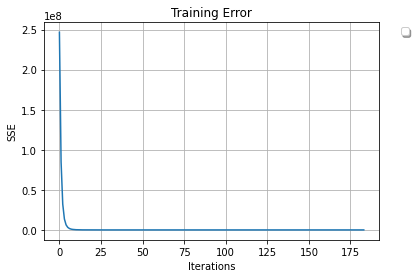


Weights:  [ 1.89271023e+02 -3.90381563e-02 -3.68441162e-04  3.41862701e-02
  1.98254097e-02 -4.08432604e-04  5.23472491e-04  7.02056895e-04
  5.45076395e-04  6.03654727e-04 -1.21576363e-01  1.21963536e-01
 -1.19783799e-03  4.50368783e-03  4.94874267e+01  1.51039265e+02]

Training Data Errors
SSE:  4.33181251726796
RMSE:  0.018870298465617892

Testing Data Errors
SSE:  1.678690569364865
RMSE:  0.017943196445702764


In [22]:
reg= LinearRegression(df.values[:,0:-1], df.values[:, -1], tolerance= 0.05, 
                      learningRate=0.00004,maxIter=50000, gd=True) 
reg.fit()

###<H4>Stochastic Gradient Descent without Regularization

Data is full rank
Data is not Low Rank
Solving using Stochastic Gradient Descent


  0%|          | 89/50000 [00:00<01:15, 664.94it/s]

Model has stopped Learning



No handles with labels found to put in legend.


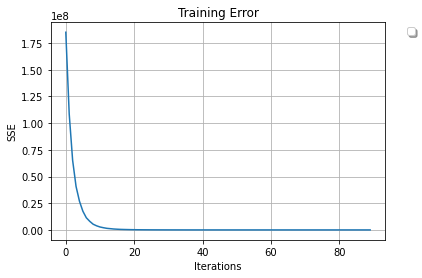


Weights:  [ 1.89271345e+02 -6.30552240e-02  1.20562854e-01  6.60573357e-02
 -7.93490128e-02  8.51774802e-03  9.04474990e-03  3.74189115e-03
  2.50139755e-02 -5.66141094e-03 -3.11794393e-01  2.83923003e-01
  1.23647757e-02  1.68884894e-02  4.95266698e+01  1.51007065e+02]

Training Data Errors
SSE:  92.18885124693895
RMSE:  0.08705288028575002

Testing Data Errors
SSE:  36.997594013239606
RMSE:  0.08423667728949642


In [23]:
reg= LinearRegression(df.values[:,0:-1], df.values[:, -1], tolerance= 0.05, 
                      learningRate=0.00004,maxIter=50000, sgd=True, sgd_sample_size=0.5) 
reg.fit()

###<H4> **Ridge** **Regression**

###<H4> Gradient Descent with Regularization

Data is full rank
Data is not Low Rank
Solving using Gradient Descent


  0%|          | 183/50000 [00:00<00:10, 4759.58it/s]
No handles with labels found to put in legend.


Model has stopped learning


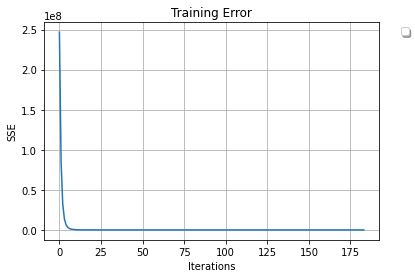


Weights:  [ 1.89239911e+02 -3.53390717e-02  4.56747486e-03  3.94147020e-02
  1.82230816e-02  1.04838460e-02  2.86849172e-05  1.20496176e-03
  5.62405041e-03 -5.55380801e-04 -1.19049102e-01  1.27011553e-01
 -6.62339917e-03  5.75297410e-03  4.94892790e+01  1.51001503e+02]

Training Data Errors
SSE:  27.42460091554014
RMSE:  0.0474803707601876

Testing Data Errors
SSE:  11.989580881719842
RMSE:  0.04795307785553414


In [24]:
reg= LinearRegression(df.values[:,0:-1], df.values[:, -1], tolerance= 0.05, 
                      learningRate=0.00004,maxIter=50000, gd=True, reg=True, reg_lambda=2, regtype= "ridge") 
reg.fit()

###<H4> Stochastic Gradient Descent with Regularization

Data is full rank
Data is not Low Rank
Solving using Stochastic Gradient Descent


  0%|          | 94/50000 [00:00<01:11, 698.97it/s]

Model has stopped Learning



No handles with labels found to put in legend.


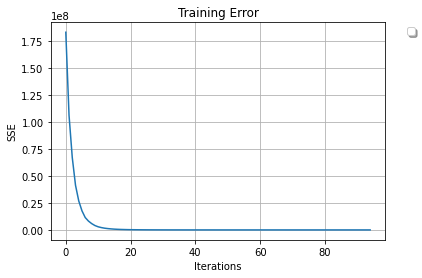


Weights:  [ 1.89209044e+02 -3.32010334e-02  1.07312540e-01  5.45074462e-02
 -7.30632809e-02  2.83081247e-02  6.71017352e-03  4.41616295e-03
  2.87869240e-02 -6.58742758e-03 -2.72956525e-01  2.67961764e-01
 -2.36284764e-03  1.65914226e-02  4.95202785e+01  1.50939145e+02]

Training Data Errors
SSE:  172.59645537394294
RMSE:  0.11911319652339447

Testing Data Errors
SSE:  72.91240536050526
RMSE:  0.11825382561602046


In [25]:
reg= LinearRegression(df.values[:,0:-1], df.values[:, -1], tolerance= 0.05, 
                      learningRate=0.00004,maxIter=50000, sgd=True, sgd_sample_size=0.5, reg=True, reg_lambda=2, regtype= "ridge") 
reg.fit()

###<H4> **Lasso** **Regression**

###<H4> Gradient Descent with Regularization

Data is full rank
Data is not Low Rank
Solving using Gradient Descent


  0%|          | 183/50000 [00:00<00:07, 6540.37it/s]

Model has stopped learning



No handles with labels found to put in legend.


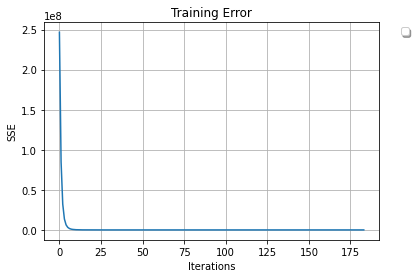


Weights:  [ 1.89270859e+02 -3.65011665e-02 -4.69878810e-04  3.18367340e-02
  1.85455447e-02 -5.75096145e-04  2.69272279e-04  5.13526561e-04
  2.35924020e-04  5.51657167e-04 -1.21402788e-01  1.21770214e-01
 -1.53545472e-03  4.25794005e-03  4.94871448e+01  1.51039323e+02]

Training Data Errors
SSE:  4.316829105164983
RMSE:  0.01883763472770402

Testing Data Errors
SSE:  1.6746012123941945
RMSE:  0.017921327949474368


In [26]:
reg= LinearRegression(df.values[:,0:-1], df.values[:, -1], tolerance= 0.05, 
                      learningRate=0.00004,maxIter=50000, gd=True, reg=True, reg_lambda=2, regtype= "Lasso") 
reg.fit()

###<H4> Stochastic Gradient Descent with Regularization

Data is full rank
Data is not Low Rank
Solving using Stochastic Gradient Descent


  0%|          | 98/50000 [00:00<01:36, 519.43it/s]

Model has stopped Learning



No handles with labels found to put in legend.


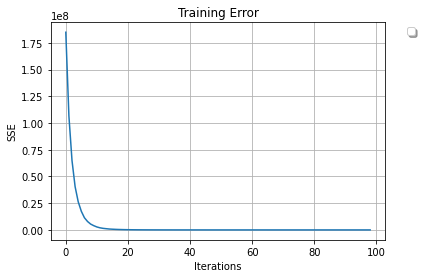


Weights:  [ 1.89270332e+02 -6.67994614e-02  7.84048200e-02  6.43756391e-02
 -3.96727289e-02  4.15376295e-03  5.12899691e-03  2.35760383e-03
  1.26372185e-02 -2.60642219e-03 -2.25981398e-01  2.09794273e-01
  5.74991720e-03  1.11034958e-02  4.95069082e+01  1.51021973e+02]

Training Data Errors
SSE:  40.24306635881308
RMSE:  0.05751610604417906

Testing Data Errors
SSE:  16.060099458392482
RMSE:  0.05549944010193963


In [27]:
reg= LinearRegression(df.values[:,0:-1], df.values[:, -1], tolerance= 0.05, 
                      learningRate=0.00004,maxIter=50000, sgd=True, sgd_sample_size=0.5, reg=True, reg_lambda=2, regtype= "Lasso") 
reg.fit()

Neural Networks


In [28]:
df = pd.read_csv("hour.csv")

In [29]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [30]:
dum_data = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dum_data:
    dumm = pd.get_dummies(df[each], prefix=each, drop_first=False)
    df = pd.concat([df, dumm], axis=1)

datadrop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = df.drop(datadrop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
datafea = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
fea_scal = {}
for each in datafea:
    mean, std = data[each].mean(), data[each].std()
    fea_scal[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [32]:
# Data should be separated into features and targets.
test_data = data[-21*24:]
data = data[:-21*24]
data_Target = ['cnt', 'casual', 'registered']
features, targets = data.drop(data_Target, axis=1), data[data_Target]
fea_test, Targetdata_test = test_data.drop(data_Target, axis=1), test_data[data_Target]

In [33]:
# Save the most recent 60 days or so of data as a validation set.
Feature_testdata, Target_traindata = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [34]:
class NeuralNetwork(object):
    def __init__(self, ip_nodes, hidden_nodes, op_nodes, learning_rate):
        
        self.ip_nodes = ip_nodes
        self.hidden_nodes = hidden_nodes
        self.op_nodes = op_nodes

    
        self.Hidden_input_weigh = np.random.normal(0.0, self.ip_nodes**-0.5, 
                                       (self.ip_nodes, self.hidden_nodes))

        self.Hidden_output_weigh = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.op_nodes))
        self.lr = learning_rate
        self.act_funct = lambda x : (1/ (1+ np.exp(-x)))   
                    

    def train(self, features, targets):
        record_n = features.shape[0]
        weight_input_Del = np.zeros(self.Hidden_input_weigh.shape)
        weight_output_Del = np.zeros(self.Hidden_output_weigh.shape)
        for X, y in zip(features, targets):
            
            Op_final, Op_hidden = self.pass_forwad_train(X)
         
            weight_input_Del, weight_output_Del = self.backpropagation(Op_final, Op_hidden, X, y, 
                                                                     weight_input_Del, weight_output_Del)
        self.wt_update(weight_input_Del, weight_output_Del, record_n)
        
    def pass_forwad_train(self, X):
     
        ip_hidden = np.dot(X, self.Hidden_input_weigh) 
        Op_hidden = self.act_funct(ip_hidden) 

        ip_final =  np.dot(Op_hidden, self.Hidden_output_weigh)
        Op_final = ip_final 
        
        return Op_final, Op_hidden

    def backpropagation(self, Op_final, Op_hidden, X, y, weight_input_Del, weight_output_Del):

        error = y - Op_final
        errorhide = np.dot(self.Hidden_output_weigh, error)
        errorhide_op = error 

        errorhide_term = errorhide * Op_hidden * (1 - Op_hidden)
        weight_input_Del += errorhide_term * X[:,None]
        weight_output_Del += errorhide_op * Op_hidden[:,None]
        return weight_input_Del, weight_output_Del

    def wt_update(self, weight_input_Del, weight_output_Del, record_n):

        self.Hidden_output_weigh += self.lr * weight_output_Del / record_n 
        self.Hidden_input_weigh += self.lr * weight_input_Del / record_n 
    def NN_model_fit(self, features):

        ip_hidden =  np.dot(features, self.Hidden_input_weigh)
        Op_hidden = self.act_funct(ip_hidden)

        ip_final = np.dot(Op_hidden, self.Hidden_output_weigh)
        Op_final = ip_final  
        
        return Op_final


In [35]:
import sys
def MSE(y, Y):
    return np.mean((y-Y)**2)

# Analyze 128 records at random from the training data set.
N_i = Feature_testdata.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, op_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    batch = np.random.choice(Feature_testdata.index, size=128)
    X, y = Feature_testdata.loc[batch].values, Target_traindata.loc[batch]['cnt']                   
    network.train(X, y)
    
    # Printing out traning Results
    loss_trai = MSE(network.NN_model_fit(Feature_testdata).T, Target_traindata['cnt'].values)
    validation_loss = MSE(network.NN_model_fit(val_features).T, val_targets['cnt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... ..Training loss: " + str(loss_trai)[:5] \
                     + " ..... Validation loss: " + str(validation_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(loss_trai)
    losses['validation'].append(validation_loss)

Progress: 100.0% ... ..Training loss: 0.079 ..... Validation loss: 0.166

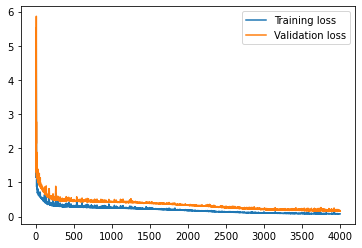

In [36]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

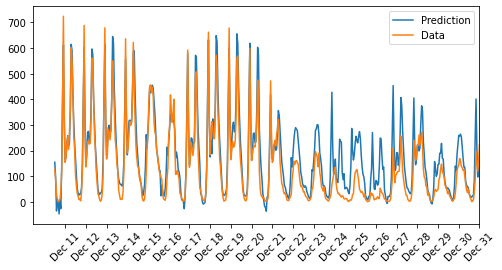

In [37]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = fea_scal['cnt']
Pred = network.NN_model_fit(fea_test).T*std + mean
ax.plot(Pred[0], label='Prediction')
ax.plot((Targetdata_test['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(Pred))
ax.legend()

dat = pd.to_datetime(df.loc[test_data.index]['dteday'])
dat = dat.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dat))[12::24])
_ = ax.set_xticklabels(dat[12::24], rotation=45)


the proportion of Decembers training instances is
5.801481481481482
The proportion of training examples for each month should be if we wish  
 to provide an equal number of training examples for each month.
8.333333333333334


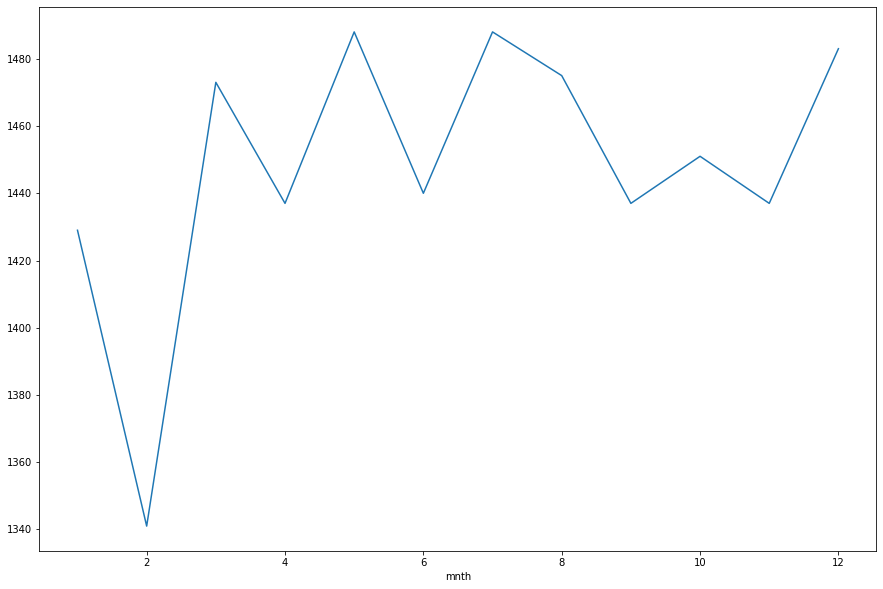

In [38]:
print('the proportion of Decembers training instances is')
print(data[data['mnth_12'] == 1 ].shape[0] / data.shape[0]*100)
print('The proportion of training examples for each month should be if we wish  \n \
to provide an equal number of training examples for each month.')
print(100/12) 
fig, ax = plt.subplots(figsize=(15,10))
df.groupby(['mnth']).count()['cnt'].plot(ax=ax);
